# DBSCAN Clustering mit Python
### Präsentation von Ellen Kistner und Lais Lemke

In dieser Präsentation zeigen wir, wie der DBSCAN-Algorithmus verwendet wird, um Cluster in einem Datensatz zu identifizieren. 
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
DBSCAN steht für *Density-Based Spatial Clustering of Applications with Noise* und ist eine beliebte Methode, um Cluster zu finden. 

## Urheber und erste Veröffentlichung
**Autoren:** Martin Ester, Hans-Peter Kriegel, Jörg Sander, Xiaowei Xu  
**Erste Veröffentlichung:** 1996  
**Veröffentlichung:** Forschungsarbeit "A Density-Based Algorithm for Discovering Clusters in Large Spatial Databases with Noise"  
**Konferenz:** 2nd International Conference on Knowledge Discovery and Data Mining (KDD-96) (Quellen hinzufügen?)

## Originärer Einsatzbereich
DBSCAN wurde ursprünglich für die Analyse von räumlichen (geografischen) Datenbanken entwickelt. Das Ziel war es, Cluster in großen, räumlichen Datensätzen zu identifizieren, insbesondere solche, die nicht kugelförmig sind, sowie "Rauschen" (Noise) in den Daten zu erkennen.

## Funktionsweise und Kernidee
Die Kernidee von DBSCAN besteht darin, Cluster als dichte Regionen von Datenpunkten in einem Datensatz zu identifizieren und Punkte außerhalb dieser dichten Regionen als Rauschen (Noise) zu klassifizieren. DBSCAN clustert die Daten häufig auf eine Weise, die der menschlichen Intuition entspricht, indem es Gruppen von dicht beieinanderliegenden Punkten zu Clustern zusammenfasst und isolierte Punkte als Ausreißer behandelt. Anstatt eine bestimmte Anzahl von Clustern vorzugeben oder nur kugelförmige Cluster zu erkennen, sucht DBSCAN nach natürlichen Gruppierungen von Punkten, basierend auf ihrer Dichte und ihrer Nähe zueinander.

### Grundlegende Schritte:
1. **Nachbarschaftsprüfung:** Für jeden Punkt im Datensatz wird geprüft, wie viele Nachbarn er in einem Umkreis von `eps` hat (Nachbarschaftsbereich).
2. **Kernpunkte:** Punkte, die mindestens `min_samples` Nachbarn in ihrer `eps`-Nachbarschaft haben, werden als **Kernpunkte** definiert. Diese Punkte sind potenzielle Zentren von Clustern.
3. **Randpunkte:** Punkte, die weniger als `min_samples` Nachbarn haben, aber sich innerhalb der `eps`-Umgebung eines Kernpunkts befinden, werden als **Randpunkte** klassifiziert.
4. **Rauschen (Noise):** Punkte, die weder Kernpunkte noch Randpunkte sind, werden als **Rauschen** oder **Outliers** betrachtet.
5. **Cluster-Bildung:** Cluster entstehen, wenn Kernpunkte direkt oder indirekt miteinander verbunden sind, d.h., wenn sie über andere Kernpunkte erreichbar sind.

# Hier Alles noch mal bildlich erläutern!


## Voraussetzungen
??

## Vorteile
- **Keine Vorgabe der Clusteranzahl nötig:** Im Gegensatz zu anderen Clustering-Algorithmen wie K-Means muss die Anzahl der Cluster nicht im Voraus angegeben werden.
- **Erkennung von Clustern beliebiger Form:** DBSCAN kann Cluster von beliebiger Form und Dichte erkennen, da es nicht auf kugelförmige Cluster beschränkt ist.
- **Outlier-Erkennung:** DBSCAN identifiziert automatisch Ausreißer oder Rauschen, die nicht zu Clustern gehören.
- **Skalierbarkeit:** Der Algorithmus ist effizient für große Datensätze und funktioniert gut in großen räumlichen Datenbanken.

## Nachteile
- **Wahl der Parameter:** Die Wahl der Parameter `eps` und `min_samples` ist entscheidend und kann je nach Datensatz schwierig sein.
- **Probleme bei variierenden Dichten:** DBSCAN funktioniert nicht gut, wenn die Dichte der Cluster stark variiert, da für alle Cluster dieselben Parameter verwendet werden.
- **Speicheranforderungen:** Der Algorithmus kann für sehr große Datensätze speicherintensiv sein, insbesondere wenn der Datensatz nicht effizient gespeichert oder verarbeitet wird.


## Wichtige Parameter
- `eps` (`epsilon`): Maximale Entfernung, die zwei Punkte voneinander haben dürfen, um als Nachbarn zu gelten, kann als Radium um einen Punkt gesehen werden. Alle Punkte, die in diesem Radius sind, sind Nachbarn. 
- `min_samples`: Minimale Anzahl von Punkten (Nachbarn) in einem Umkreis von `eps`, die notwendig ist, um einen Cluster zu bilden.

In [30]:
# Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import ipywidgets as widgets


## Datengenerierung

Wir verwenden den `make_moons` Datensatz aus der `sklearn`-Bibliothek, der zwei halbmondförmige Cluster erzeugt. Dies eignet sich gut, um zu zeigen, wie DBSCAN mit Clustern arbeitet. Augenscheinlich kann man in diesem Datensatz zwei Halbmonde erkennen diese sollen nun auch als solche geclustert werden. 

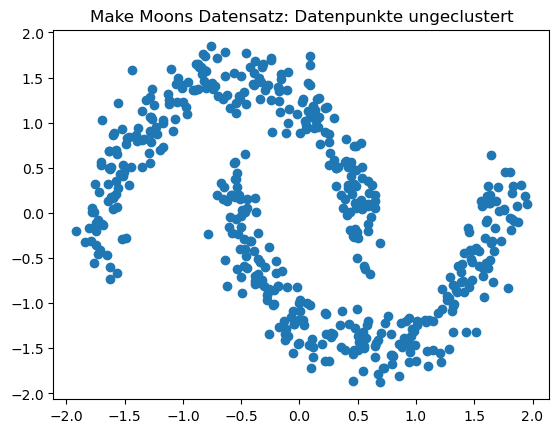

In [31]:
# Generiere Daten
X, _ = make_moons(n_samples=500, noise=0.1)
X = StandardScaler().fit_transform(X)

# Daten plotten
plt.scatter(X[:, 0], X[:, 1])
plt.title("Make Moons Datensatz: Datenpunkte ungeclustert")
plt.show()


## DBSCAN Clustering

Nun wenden wir den DBSCAN-Algorithmus auf den Datensatz an.
Wir wählen den Radius um jeden Datenpunkt `eps=0.2` und als Mindestanzahl von Datenpunkten in diesem Radius `min_samples=5`.


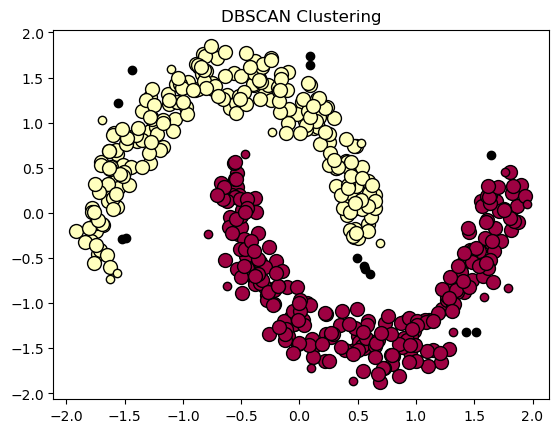

In [32]:
# DBSCAN Modell erstellen
dbscan = DBSCAN(eps=0.2, min_samples=5)

# Fitting und Labels generieren
labels = dbscan.fit_predict(X)

# Cluster identifizieren
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
unique_labels = set(labels)

# Plotten der Cluster
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'  # Schwarz für Ausreißer
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.show()


## Visualisierung der Ergebnisse

In der obigen Grafik sind Punkte, die zu einem Cluster gehören, farblich markiert. Punkte, die keine Nachbarn haben (also Rauschen oder "Noise" sind), werden in schwarz dargestellt.

Durch Anpassung von `eps` und `min_samples` können unterschiedliche Clustermuster erzeugt werden. Dies ist in der nächsten Funktion gut einzusehen. Die Wert `eps` verändern den Radius um jeden Punkt und ...


In [33]:
# Funktion zur Visualisierung unterschiedlicher eps-Werte
def plot_dbscan(eps, min_samples):
    # DBSCAN anwenden
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)

    # Plot der Datenpunkte nach ihren Cluster-Labels
    plt.figure(figsize=(6, 6))
    
    # Farbkodierung der Cluster
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Rauschen schwarz darstellen
            col = 'k'
        class_member_mask = (labels == k)
        
        # Plot der Clusterpunkte
        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                 markeredgecolor='k', markersize=6)
    
    plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


In [34]:
# Slider für eps und min_samples
eps_slider = widgets.FloatSlider(value=0.2, min=0.05, max=1.0, step=0.05, description='eps')
min_samples_slider = widgets.IntSlider(value=5, min=1, max=20, step=1, description='min_samples')

# Interaktives Display
ui = widgets.HBox([eps_slider, min_samples_slider])
out = widgets.interactive_output(plot_dbscan, {'eps': eps_slider, 'min_samples': min_samples_slider})

# Anzeige der interaktiven Steuerung und des Outputs
display(ui, out)

Output()